## This notebook contains partial soluations to the Statstopology (April 6)  exercises  (also includes data from the Statistics1 April 4 session)

In [2]:
%matplotlib inline

## 1st a bit more about images

## Reducing the dimensionality of data with Singular Value Decomposition
Multi-dimensional data is difficult to visualize and understand. There are a number of techniques to reduce the dimensionality of data.  SVD is able to approximate a list of "k" vectors into "m" vectors.
To demonstrate, we will take the SVD of an Image, based on this example:
http://www.frankcleary.com/svdimage/

For more details, a nice description of SVD can be found here:
http://www.frankcleary.com/svd/

In [3]:
# Some libraries we will use
import numpy
np = numpy
from scipy.stats import pearsonr
from scipy.optimize import leastsq

import matplotlib.pyplot as plt
import cv2   ## Opencv


from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

##  Real Data.  Bird characteristics and distances travelled during migration.

http://datadryad.org/resource/doi:10.5061/dryad.5q034


In [4]:
import pandas as pd
df=pd.read_csv('bird_data_vincze_etal_2015.csv', sep=',')
df.values

array([['Accipiter gentilis', 542.0, 1100.0, ..., 0.8370000000000001,
        5.841, 0.193],
       ['Accipiter nisus', 2938.1, 260.0, ..., 0.44, 5.891,
        0.09300000000000001],
       ['Acrocephalus scirpaceus', 3577.0, 14.0, ..., 0.07, 4.835, 0.008],
       ..., 
       ['Tyto alba', 0.0, 290.0, ..., 0.215, 6.51, 0.145],
       ['Upupa epops', 3281.0, 55.0, ..., 0.094, 4.87, 0.043],
       ['Vanellus vanellus', 1976.7, 200.0, ..., 0.308, 6.129, 0.084]], dtype=object)

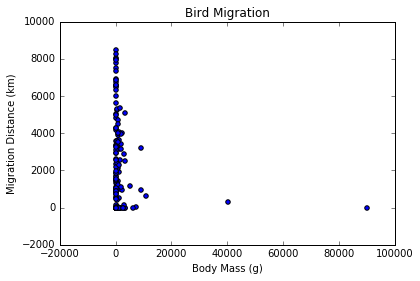

In [5]:
plt.scatter(df['Body mass'], df['Migration distance'])
plt.ylabel('Migration Distance (km)')
plt.xlabel('Body Mass (g)')
plt.title('Bird Migration')
plt.show()

# Exercise to do:
Find what correlates best with what.  Try to fit a relation.

In [6]:
## 1st try a few plots
df

,Species,Migration distance,Body mass,Brain mass,Size of cerebellum,Size of telencephalon,Size of optic lobe,Wing aspect ratio,Wing area
0,Accipiter gentilis,542.0,1100.0,7.674,1.088,4.617,0.837,5.841,0.193
1,Accipiter nisus,2938.1,260.0,3.081,0.499,1.593,0.440,5.891,0.093
2,Acrocephalus scirpaceus,3577.0,14.0,0.483,0.066,0.282,0.070,4.835,0.008
3,Aegithalos caudatus,26.1,7.5,0.456,0.035,0.283,0.059,4.463,0.007
4,Aegypius monachus,972.2,9000.0,24.808,2.812,17.936,1.020,NaN,NaN
5,Agapornis fischeri,0.0,42.0,1.997,0.121,1.492,0.120,NaN,NaN
6,Alauda arvensis,1107.4,39.0,1.176,0.087,0.865,0.115,5.430,0.024
7,Alcedo atthis,1302.2,35.0,0.909,0.117,0.505,0.141,6.060,0.013
8,Amazona versicolor,0.0,400.0,7.818,0.622,5.957,0.355,NaN,NaN
9,Anas clypeata,3426.8,737.5,4.015,0.490,2.700,0.245,NaN,NaN


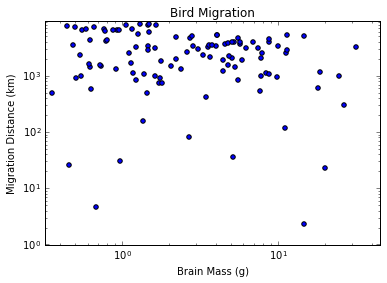

In [7]:
x = df['Brain mass']
y = df['Migration distance']
plt.scatter(x,y)
plt.ylabel('Migration Distance (km)')
plt.xlabel('Brain Mass (g)')
plt.xscale('log')
plt.yscale('log')
plt.xlim(min(x)*.9, max(x)*1.1)
plt.ylim(1., max(y)*1.1)
plt.title('Bird Migration')
plt.show()

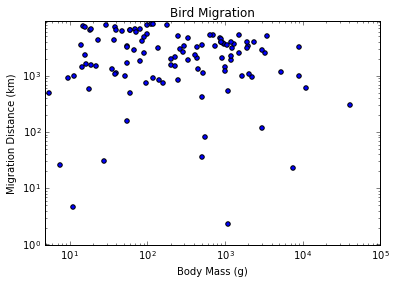

In [8]:
x = df['Body mass']
y = df['Migration distance']
plt.scatter(x,y)
plt.ylabel('Migration Distance (km)')
plt.xlabel('Body Mass (g)')
plt.xscale('log')
plt.yscale('log')
plt.xlim(min(x)*.9, max(x)*1.1)
plt.ylim(1., max(y)*1.1)
plt.title('Bird Migration')
plt.show()

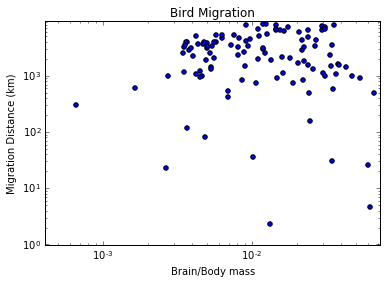

In [9]:
x = df['Brain mass'] / df['Body mass']
y = df['Migration distance']
plt.scatter(x,y)
plt.ylabel('Migration Distance (km)')
plt.xlabel('Brain/Body mass')
plt.xscale('log')
plt.yscale('log')
plt.xlim(min(x)*.9, max(x)*1.1)
plt.ylim(1., max(y)*1.1)
plt.title('Bird Migration')
plt.show()

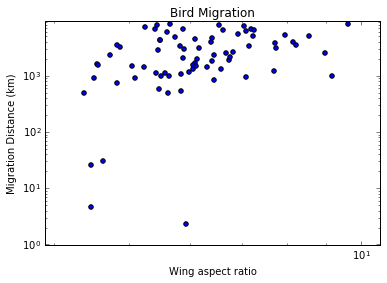

In [10]:
x = df['Wing aspect ratio']
y = df['Migration distance']
plt.scatter(x,y)
plt.ylabel('Migration Distance (km)')
plt.xlabel('Wing aspect ratio')
plt.xscale('log')
plt.yscale('log')
plt.xlim(min(x)*.9, max(x)*1.1)
plt.ylim(1., max(y)*1.1)
plt.title('Bird Migration')
plt.show()

In [11]:
# Can we find some correlation coefficients?
pearsonr(df['Wing aspect ratio'], df['Migration distance'])


(nan, 1.0)

In [12]:
df  #  Note the NaN  (not a number)

,Species,Migration distance,Body mass,Brain mass,Size of cerebellum,Size of telencephalon,Size of optic lobe,Wing aspect ratio,Wing area
0,Accipiter gentilis,542.0,1100.0,7.674,1.088,4.617,0.837,5.841,0.193
1,Accipiter nisus,2938.1,260.0,3.081,0.499,1.593,0.440,5.891,0.093
2,Acrocephalus scirpaceus,3577.0,14.0,0.483,0.066,0.282,0.070,4.835,0.008
3,Aegithalos caudatus,26.1,7.5,0.456,0.035,0.283,0.059,4.463,0.007
4,Aegypius monachus,972.2,9000.0,24.808,2.812,17.936,1.020,NaN,NaN
5,Agapornis fischeri,0.0,42.0,1.997,0.121,1.492,0.120,NaN,NaN
6,Alauda arvensis,1107.4,39.0,1.176,0.087,0.865,0.115,5.430,0.024
7,Alcedo atthis,1302.2,35.0,0.909,0.117,0.505,0.141,6.060,0.013
8,Amazona versicolor,0.0,400.0,7.818,0.622,5.957,0.355,NaN,NaN
9,Anas clypeata,3426.8,737.5,4.015,0.490,2.700,0.245,NaN,NaN


In [13]:
## Remove the Nan 
dfgood = df.copy()
dfgood = dfgood.dropna()   
dfgood

,Species,Migration distance,Body mass,Brain mass,Size of cerebellum,Size of telencephalon,Size of optic lobe,Wing aspect ratio,Wing area
0,Accipiter gentilis,542.0,1100.0,7.674,1.088,4.617,0.837,5.841,0.193
1,Accipiter nisus,2938.1,260.0,3.081,0.499,1.593,0.440,5.891,0.093
2,Acrocephalus scirpaceus,3577.0,14.0,0.483,0.066,0.282,0.070,4.835,0.008
3,Aegithalos caudatus,26.1,7.5,0.456,0.035,0.283,0.059,4.463,0.007
6,Alauda arvensis,1107.4,39.0,1.176,0.087,0.865,0.115,5.430,0.024
7,Alcedo atthis,1302.2,35.0,0.909,0.117,0.505,0.141,6.060,0.013
10,Anas crecca,3374.1,300.0,2.832,0.366,1.739,0.205,7.156,0.050
12,Anas platyrhynchos,1934.0,1200.0,5.881,0.553,4.001,0.400,6.743,0.109
13,Anas querquedula,4795.9,330.0,2.730,0.290,1.820,0.170,6.410,0.054
15,Anser albifrons,3987.5,2374.0,8.710,1.115,5.905,0.485,8.155,0.211


In [14]:
# Now try a correlation coefficient
pearsonr(dfgood['Wing aspect ratio'], dfgood['Migration distance'])

(0.45133147883788971, 7.1191161457110805e-06)

In [15]:
# Consider what things should be correlated (normalize the brain masses)
dfgood.loc[:,'Brain body ratio'] = pd.Series(dfgood['Brain mass']/dfgood['Body mass'], index=dfgood.index)
dfgood.loc[:,'Brain cerebellum body ratio'] = pd.Series(dfgood['Size of cerebellum']/dfgood['Body mass'], index=dfgood.index)
dfgood.loc[:,'Brain telencephalon body ratio'] = pd.Series(dfgood['Size of telencephalon']/dfgood['Body mass'], index=dfgood.index)
dfgood.loc[:,'Brain optic lobe body ratio'] = pd.Series(dfgood['Size of optic lobe']/dfgood['Body mass'], index=dfgood.index)
dfgood.loc[:,'Brain cerebellum ratio'] = pd.Series(dfgood['Size of cerebellum']/dfgood['Brain mass'], index=dfgood.index)
dfgood.loc[:,'Brain telencephalon ratio'] = pd.Series(dfgood['Size of telencephalon']/dfgood['Brain mass'], index=dfgood.index)
dfgood.loc[:,'Brain optic lobe ratio'] = pd.Series(dfgood['Size of optic lobe']/dfgood['Brain mass'], index=dfgood.index)



In [16]:
dfgood

,Species,Migration distance,Body mass,Brain mass,Size of cerebellum,Size of telencephalon,Size of optic lobe,Wing aspect ratio,Wing area,Brain body ratio,Brain cerebellum body ratio,Brain telencephalon body ratio,Brain optic lobe body ratio,Brain cerebellum ratio,Brain telencephalon ratio,Brain optic lobe ratio
0,Accipiter gentilis,542.0,1100.0,7.674,1.088,4.617,0.837,5.841,0.193,0.006976,0.000989,0.004197,0.000761,0.141777,0.601642,0.109070
1,Accipiter nisus,2938.1,260.0,3.081,0.499,1.593,0.440,5.891,0.093,0.011850,0.001919,0.006127,0.001692,0.161960,0.517040,0.142811
2,Acrocephalus scirpaceus,3577.0,14.0,0.483,0.066,0.282,0.070,4.835,0.008,0.034500,0.004714,0.020143,0.005000,0.136646,0.583851,0.144928
3,Aegithalos caudatus,26.1,7.5,0.456,0.035,0.283,0.059,4.463,0.007,0.060800,0.004667,0.037733,0.007867,0.076754,0.620614,0.129386
6,Alauda arvensis,1107.4,39.0,1.176,0.087,0.865,0.115,5.430,0.024,0.030154,0.002231,0.022179,0.002949,0.073980,0.735544,0.097789
7,Alcedo atthis,1302.2,35.0,0.909,0.117,0.505,0.141,6.060,0.013,0.025971,0.003343,0.014429,0.004029,0.128713,0.555556,0.155116
10,Anas crecca,3374.1,300.0,2.832,0.366,1.739,0.205,7.156,0.050,0.009440,0.001220,0.005797,0.000683,0.129237,0.614054,0.072387
12,Anas platyrhynchos,1934.0,1200.0,5.881,0.553,4.001,0.400,6.743,0.109,0.004901,0.000461,0.003334,0.000333,0.094032,0.680326,0.068016
13,Anas querquedula,4795.9,330.0,2.730,0.290,1.820,0.170,6.410,0.054,0.008273,0.000879,0.005515,0.000515,0.106227,0.666667,0.062271
15,Anser albifrons,3987.5,2374.0,8.710,1.115,5.905,0.485,8.155,0.211,0.003669,0.000470,0.002487,0.000204,0.128014,0.677956,0.055683


In [17]:
##  Find correlation coefficient for all apecies characteristics with migration distance 
for thisarray in dfgood:
    if (thisarray != 'Species'):
        print(thisarray, pearsonr(dfgood[thisarray], dfgood['Migration distance']))
        

('Migration distance', (1.0, 0.0))
('Body mass', (-0.076516381440634079, 0.47097887953239492))
('Brain mass', (-0.2256756482950498, 0.031485820677500012))
('Size of cerebellum', (-0.11788988661129013, 0.26573518941333546))
('Size of telencephalon', (-0.2557376112631915, 0.014417470244574493))
('Size of optic lobe', (-0.1440836014798573, 0.17301142142114523))
('Wing aspect ratio', (0.45133147883788971, 7.1191161457110805e-06))
('Wing area', (-0.11930011389042132, 0.26001896022924226))
('Brain body ratio', (-0.23888296324797492, 0.022582860352839719))
('Brain cerebellum body ratio', (-0.084087068500134504, 0.42809501228031688))
('Brain telencephalon body ratio', (-0.3054102662983848, 0.0032417497816816022))
('Brain optic lobe body ratio', (-0.080138110862242401, 0.45017903675993554))
('Brain cerebellum ratio', (0.46477924978486845, 3.4631112131621639e-06))
('Brain telencephalon ratio', (-0.49516596804822832, 6.0454226773260706e-07))
('Brain optic lobe ratio', (0.3600790400812921, 0.00045

In [18]:
#  Plot all quanities 
def migrationplot(xtag,ytag):
    x = dfgood[xtag]
    y = dfgood[ytag]
    plt.figure()
    plt.scatter(x,y)
    plt.xlabel(xtag)
    plt.ylabel(ytag)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(min(x) * 0.9,max(x) * 1.1)
    plt.ylim(1.,100000.)   ## 1km minimum to avoid plotting zeros in log space
    plt.show()

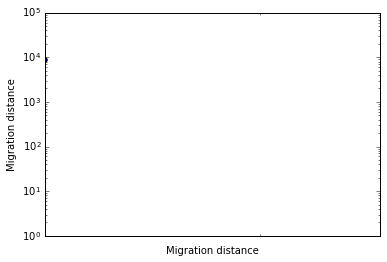

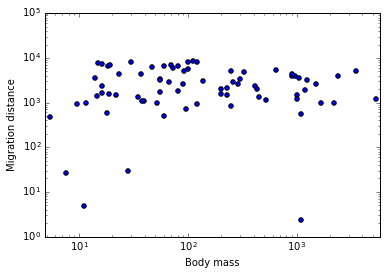

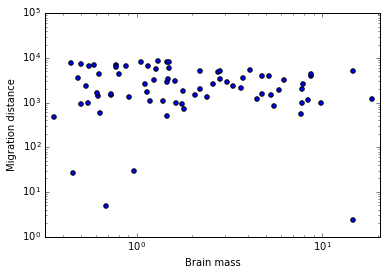

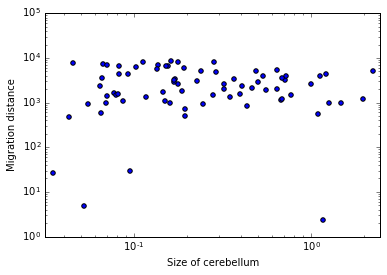

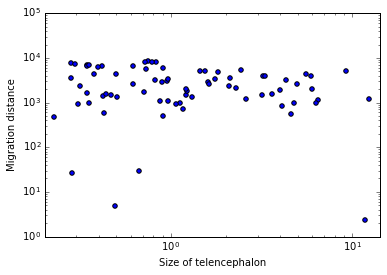

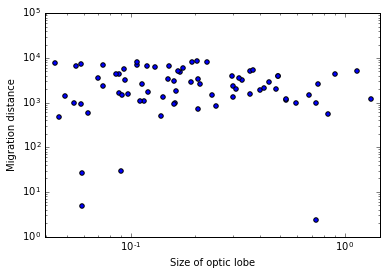

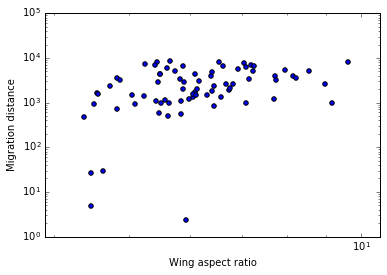

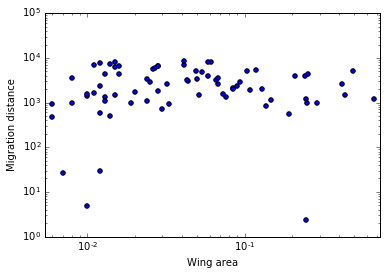

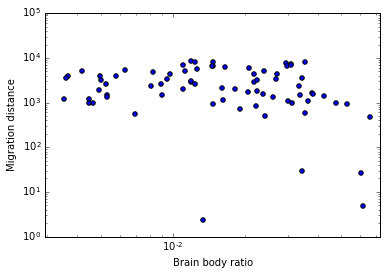

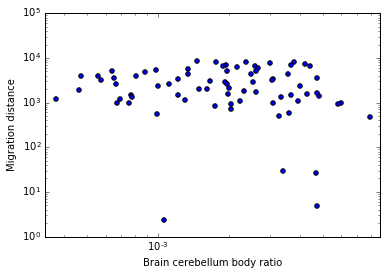

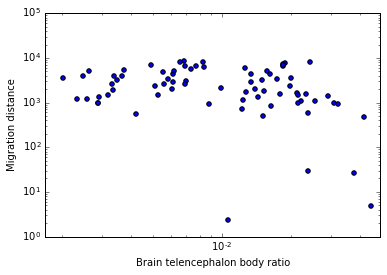

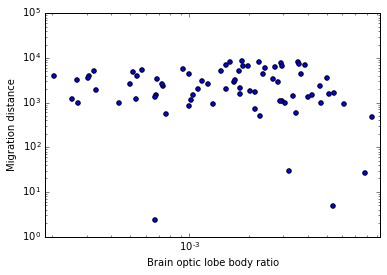

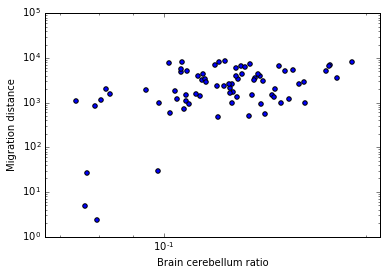

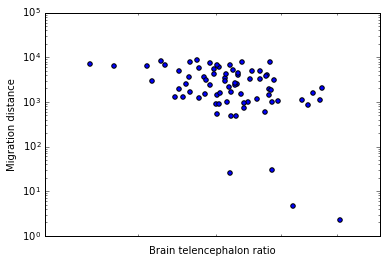

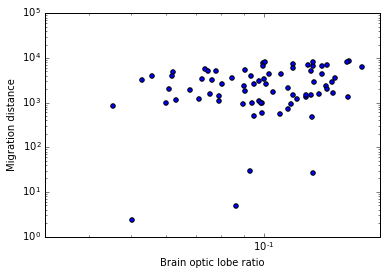

In [19]:
##  Plot Migration distance versus species charecteristics
for thisarray in dfgood:
    if (thisarray != 'Species'):
        migrationplot(thisarray,'Migration distance')

In [20]:
# Fit a line to some data using least squares minimization

from scipy.optimize import leastsq

xdata = x
ydata = y

def yfit_linear(x, a):  
    return a[0] + a[1] * x
    
def yfit_quadratic(x,a):
    return a[0] + a[1] * x + a[2] * x**2 
    
def funcdiff_linear(a, xdata, ydata):   
    return yfit_linear(xdata, a) - ydata
    
def funcdiff_quadratic(a, xdata, ydata):   
    return yfit_quadratic(xdata, a) - ydata

<type 'tuple'>
(array([ 4.01301948,  0.7403817 ,  0.        ]), 3)


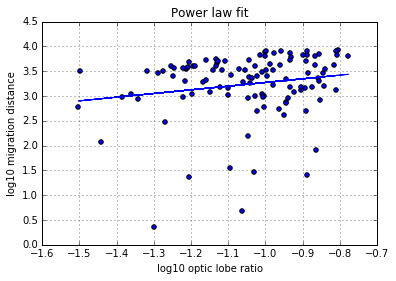

In [21]:
## fit a straight line


## should we include birds that do not migrate???
imigrate = numpy.where(df['Migration distance'] > 0.)[0]  # create a mask to use only the migrating species
xdata = df['Size of optic lobe'][imigrate] / df['Brain mass'][imigrate]
ydata = df['Migration distance'][imigrate]
logxdata = numpy.log10(xdata)
logydata = numpy.log10(ydata)
xdata = logxdata
ydata = logydata
a_init = numpy.array([0.,0.,0.])
result = leastsq(funcdiff_linear, a_init, args=(xdata,ydata))


print(type(result))
print(result)
yfit = yfit_linear(logxdata,result[0])
plt.plot(logxdata,yfit, label='y vs x fit')

plt.scatter(logxdata,logydata)
##plt.errorbar(logxdata,logydata,yerr=logerror,fmt='None')

plt.xlabel('log10 optic lobe ratio')
plt.ylabel('log10 migration distance')
plt.title('Power law fit')
plt.grid(True)
plt.show()

<type 'tuple'>
(array([ 3.01258437, -0.11594726,  0.        ]), 3)


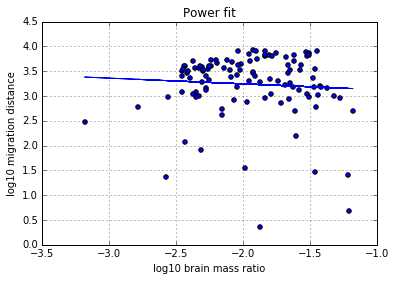

In [22]:
## fit a straight line


## should we include birds that do not migrate???
imigrate = numpy.where(df['Migration distance'] > 0.)[0]  # create a mask to use only the migrating species
xdata = df['Brain mass'][imigrate] / df['Body mass'][imigrate]
ydata = df['Migration distance'][imigrate]
logxdata = numpy.log10(xdata)
logydata = numpy.log10(ydata)
xdata = logxdata
ydata = logydata
a_init = numpy.array([0.,0.,0.])
result = leastsq(funcdiff_linear, a_init, args=(xdata,ydata))


print(type(result))
print(result)
yfit = yfit_linear(logxdata,result[0])
plt.plot(logxdata,yfit, label='y vs x fit')

plt.scatter(logxdata,logydata)
##plt.errorbar(logxdata,logydata,yerr=logerror,fmt='None')

plt.xlabel('log10 brain mass ratio')
plt.ylabel('log10 migration distance')
plt.title('Power fit')
plt.grid(True)
plt.show()

<type 'tuple'>
(array([ 0.68817167,  3.27912945,  0.        ]), 1)


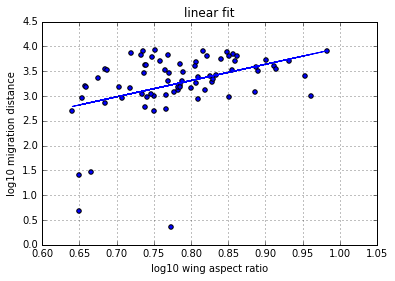

In [23]:
## fit a straight line

xdata = dfgood['Wing aspect ratio'] 
ydata = dfgood['Migration distance']
# should we include birds that do not migrate???

xdata = xdata[ydata > 0.]
ydata = ydata[ydata > 0.]

logxdata = numpy.log10(xdata)
logydata = numpy.log10(ydata)
xdata = logxdata
ydata = logydata
a_init = numpy.array([1.,1.,0.])
result = leastsq(funcdiff_linear, a_init, args=(xdata,ydata))


print(type(result))
print(result)
yfit = yfit_linear(logxdata,result[0])
plt.plot(logxdata,yfit, label='y vs x fit')

plt.scatter(logxdata,logydata)

plt.xlabel('log10 wing aspect ratio')
plt.ylabel('log10 migration distance')
plt.title('linear fit')
plt.grid(True)
plt.show()

<type 'tuple'>
(array([ 1.96413322, -6.27246766,  0.        ]), 1)


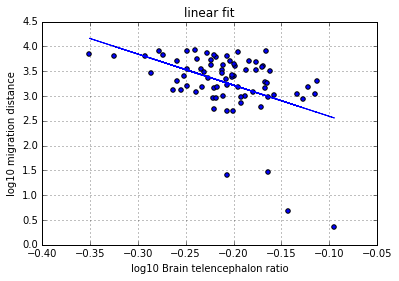

In [24]:
## fit a straight line

xdata = dfgood['Brain telencephalon ratio'] 
ydata = dfgood['Migration distance']
# should we include birds that do not migrate???

xdata = xdata[ydata > 0.]
ydata = ydata[ydata > 0.]

logxdata = numpy.log10(xdata)
logydata = numpy.log10(ydata)
xdata = logxdata
ydata = logydata
a_init = numpy.array([1.,1.,0.])
result = leastsq(funcdiff_linear, a_init, args=(xdata,ydata))


print(type(result))
print(result)
yfit = yfit_linear(logxdata,result[0])
plt.plot(logxdata,yfit, label='y vs x fit')

plt.scatter(logxdata,logydata)

plt.xlabel('log10 Brain telencephalon ratio')
plt.ylabel('log10 migration distance')
plt.title('linear fit')
plt.grid(True)
plt.show()

## More data to explore as an exercise

2016 Election data by county in USA:
https://github.com/Prooffreader/election_2016_data/tree/master/data

Income by county USA (2014):
https://www.irs.gov/uac/soi-tax-stats-county-data-2014



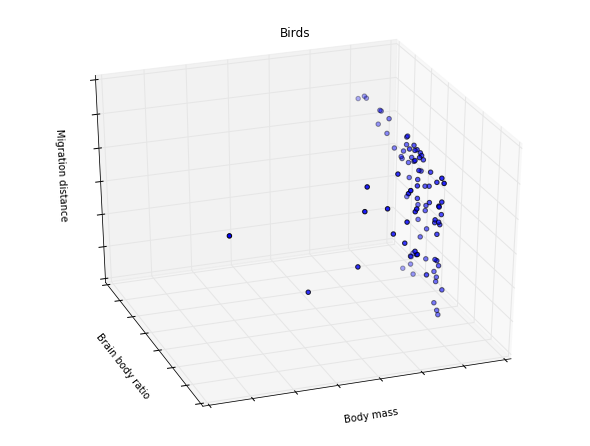

In [25]:
# Color same plots by species
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
##ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 2], c=Y)
ax.scatter(dfgood['Body mass'], dfgood['Brain body ratio'], dfgood['Migration distance'])
ax.set_title("Birds")
ax.set_xlabel('Body mass')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('Brain body ratio')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('Migration distance')
ax.w_zaxis.set_ticklabels([])   
##ax.set_yscale('log')
plt.show()


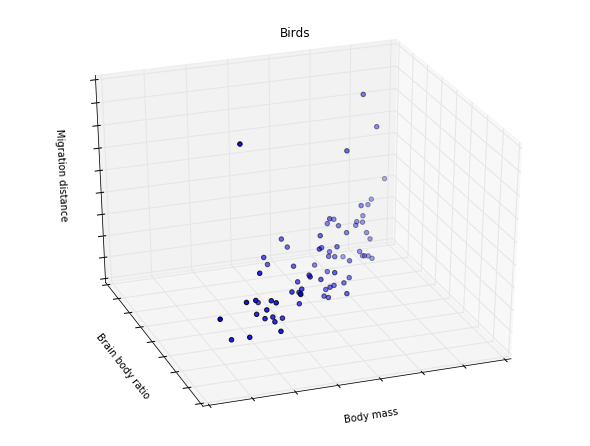

In [26]:
# Color same plots by species
x = numpy.log10(dfgood['Body mass'])
y = numpy.log10(dfgood['Brain body ratio'])
z = numpy.log10(dfgood['Migration distance'])

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
##ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 2], c=Y)
##ax.scatter(dfgood['Body mass'], dfgood['Brain body ratio'], dfgood['Migration distance'])
ax.scatter(x,y,z)
ax.set_title("Birds")
ax.set_xlabel('Body mass')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('Brain body ratio')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('Migration distance')
ax.w_zaxis.set_ticklabels([])   
##ax.set_yscale('log')
plt.show()

In [27]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [28]:
#  remove the string values from the data frame
dftmp = dfgood.copy()   ##   make a copy in order to not alter the original data frame
dftmp.columns
del dftmp['Species']    ##  Delete the species column


In [29]:
X_reduced = PCA(n_components=3).fit_transform(dftmp)

In [1]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2])
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

NameError: name 'plt' is not defined

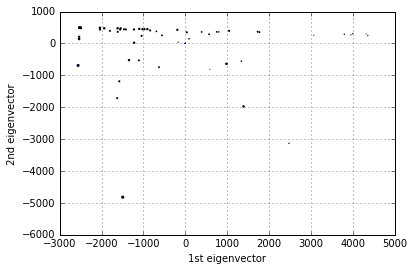

In [31]:
yfit = yfit_linear(xdata,result[0])

plt.plot(logxdata,yfit, label='Bird PCA')

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2])

plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.grid(True)
plt.show()

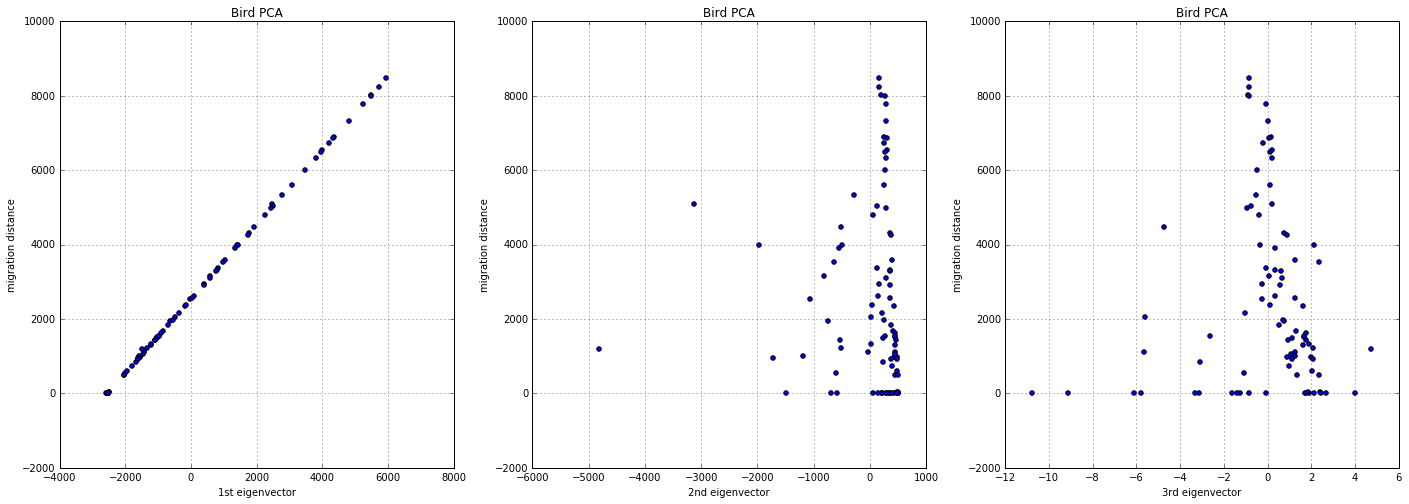

In [32]:
## plot the components versus data
plt.figure(figsize=(24,8))

xdata = X_reduced[:, 0]
ydata = dftmp['Migration distance']
plt.subplot(131), plt.scatter(xdata,ydata)
plt.xlabel('1st eigenvector')
plt.ylabel('migration distance')
plt.title('Bird PCA')
plt.grid(True)

xdata = X_reduced[:, 1]
ydata = dftmp['Migration distance']
plt.subplot(132), plt.scatter(xdata,ydata)
plt.xlabel('2nd eigenvector')
plt.ylabel('migration distance')
plt.title('Bird PCA')
plt.grid(True)

xdata = X_reduced[:, 2]
ydata = dftmp['Migration distance']
plt.subplot(133), plt.scatter(xdata,ydata)
plt.xlabel('3rd eigenvector')
plt.ylabel('migration distance')
plt.title('Bird PCA')
plt.grid(True)

plt.show()

# Migration distance dominates the 1st eigenvector

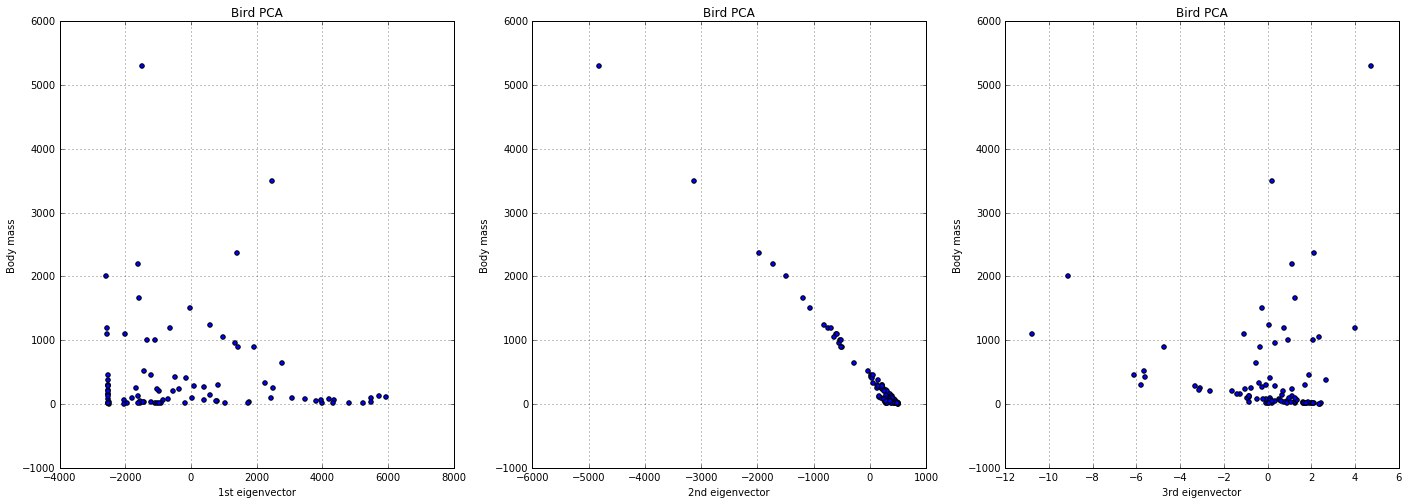

In [33]:
## plot the components versus data
plt.figure(figsize=(24,8))

xdata = X_reduced[:, 0]
ydata = dftmp['Body mass']
plt.subplot(131), plt.scatter(xdata,ydata)
plt.xlabel('1st eigenvector')
plt.ylabel('Body mass')
plt.title('Bird PCA')
plt.grid(True)

xdata = X_reduced[:, 1]
ydata = dftmp['Body mass']
plt.subplot(132), plt.scatter(xdata,ydata)
plt.xlabel('2nd eigenvector')
plt.ylabel('Body mass')
plt.title('Bird PCA')
plt.grid(True)

xdata = X_reduced[:, 2]
ydata = dftmp['Body mass']
plt.subplot(133), plt.scatter(xdata,ydata)
plt.xlabel('3rd eigenvector')
plt.ylabel('Body mass')
plt.title('Bird PCA')
plt.grid(True)

plt.show()

# Body mass dominates the 1st eigenvector

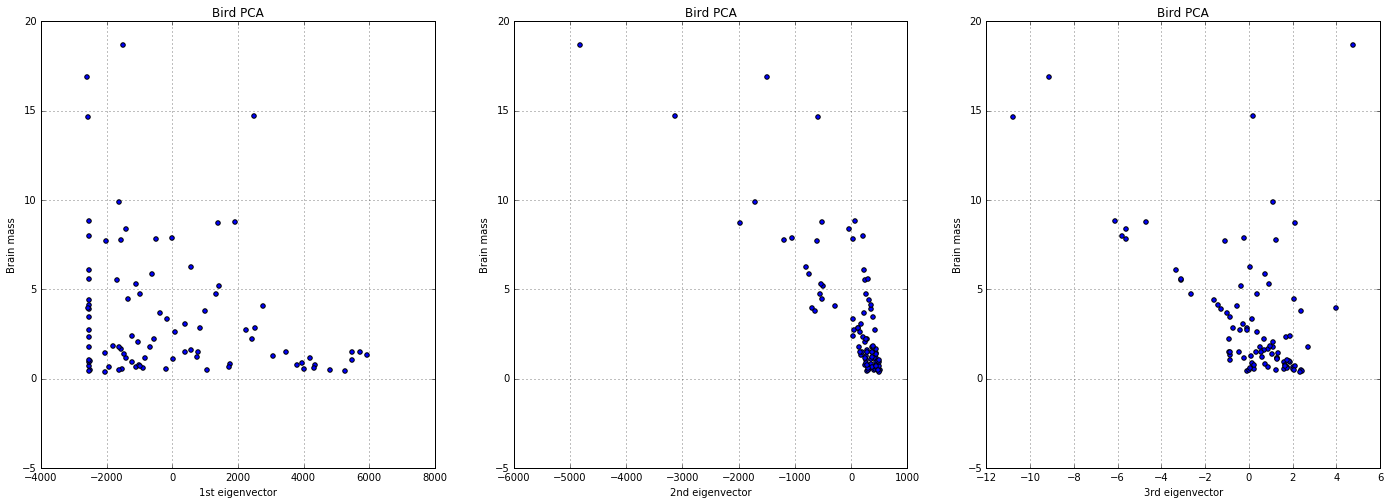

In [34]:
## 
plt.figure(figsize=(24,8))

xdata = X_reduced[:, 0]
ydata = dftmp['Brain mass']
plt.subplot(131), plt.scatter(xdata,ydata)
plt.xlabel('1st eigenvector')
plt.ylabel('Brain mass')
plt.title('Bird PCA')
plt.grid(True)

xdata = X_reduced[:, 1]
ydata = dftmp['Brain mass']
plt.subplot(132), plt.scatter(xdata,ydata)
plt.xlabel('2nd eigenvector')
plt.ylabel('Brain mass')
plt.title('Bird PCA')
plt.grid(True)

xdata = X_reduced[:, 2]
ydata = dftmp['Brain mass']
plt.subplot(133), plt.scatter(xdata,ydata)
plt.xlabel('3rd eigenvector')
plt.ylabel('Brain mass')
plt.title('Bird PCA')
plt.grid(True)

plt.show()

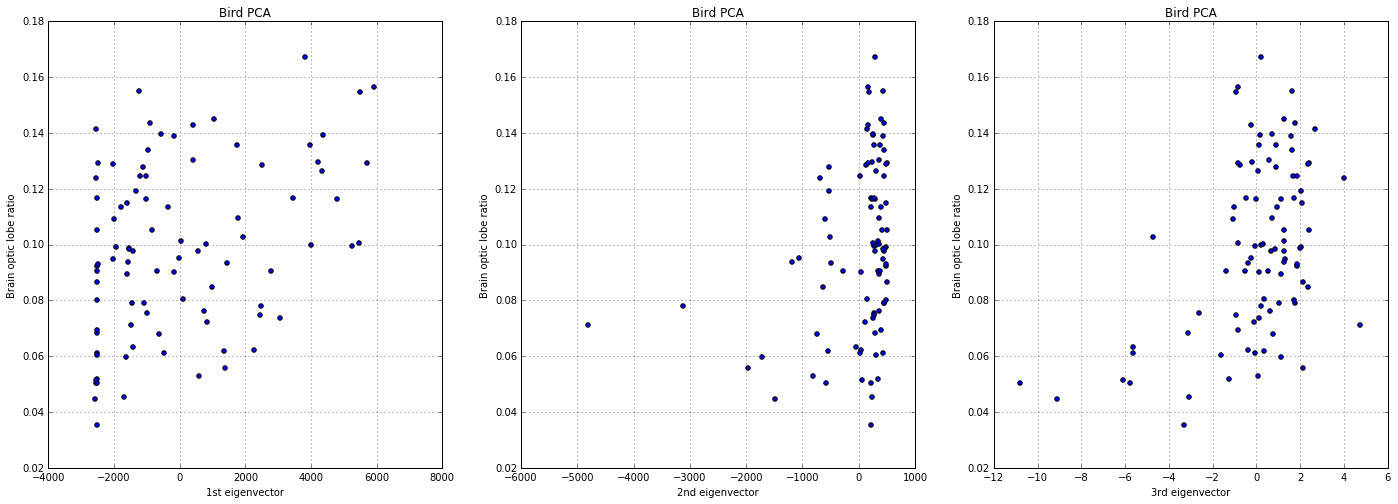

In [35]:
## 
plt.figure(figsize=(24,8))

xdata = X_reduced[:, 0]
ydata = dftmp['Brain optic lobe ratio']
plt.subplot(131), plt.scatter(xdata,ydata)
plt.xlabel('1st eigenvector')
plt.ylabel('Brain optic lobe ratio')
plt.title('Bird PCA')
plt.grid(True)

xdata = X_reduced[:, 1]
ydata = dftmp['Brain optic lobe ratio']
plt.subplot(132), plt.scatter(xdata,ydata)
plt.xlabel('2nd eigenvector')
plt.ylabel('Brain optic lobe ratio')
plt.title('Bird PCA')
plt.grid(True)

xdata = X_reduced[:, 2]
ydata = dftmp['Brain optic lobe ratio']
plt.subplot(133), plt.scatter(xdata,ydata)
plt.xlabel('3rd eigenvector')
plt.ylabel('Brain optic lobe ratio')
plt.title('Bird PCA')
plt.grid(True)

plt.show()



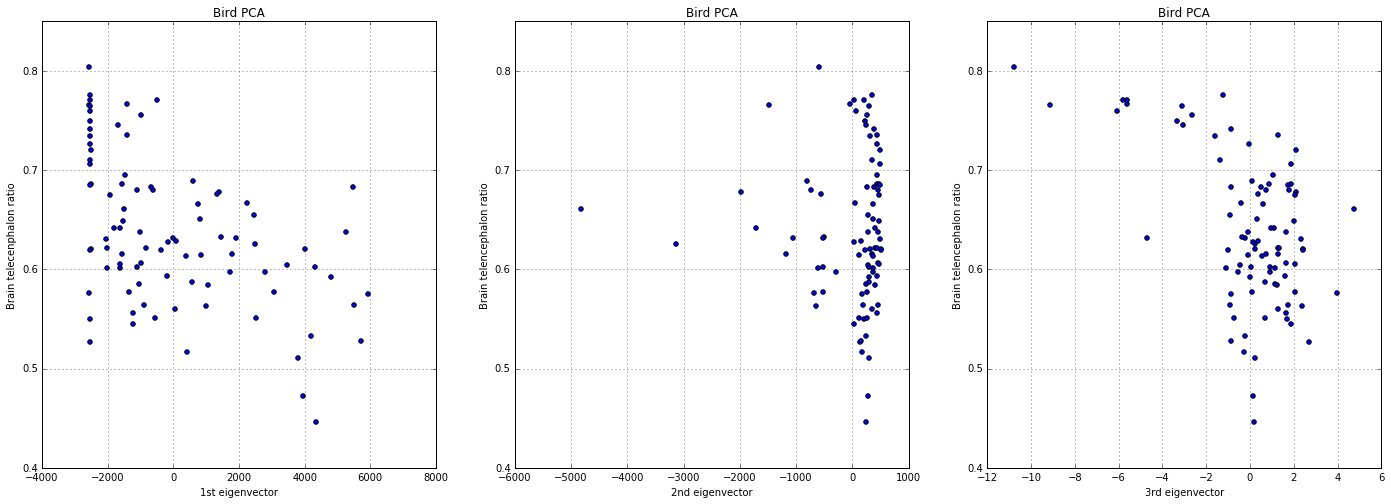

In [36]:
## 
plt.figure(figsize=(24,8))

xdata = X_reduced[:, 0]
ydata = dftmp['Brain telencephalon ratio']
plt.subplot(131), plt.scatter(xdata,ydata)
plt.xlabel('1st eigenvector')
plt.ylabel('Brain telecenphalon ratio')
plt.title('Bird PCA')
plt.grid(True)

xdata = X_reduced[:, 1]
ydata = dftmp['Brain telencephalon ratio']
plt.subplot(132), plt.scatter(xdata,ydata)
plt.xlabel('2nd eigenvector')
plt.ylabel('Brain telencephalon ratio')
plt.title('Bird PCA')
plt.grid(True)

xdata = X_reduced[:, 2]
ydata = dftmp['Brain telencephalon ratio']
plt.subplot(133), plt.scatter(xdata,ydata)
plt.xlabel('3rd eigenvector')
plt.ylabel('Brain telencephalon ratio')
plt.title('Bird PCA')
plt.grid(True)

plt.show()

In [37]:
##  Because the migration distance dominates the PCA, it would be helpful 
##     to repeat the Principle Component Analysis with migration distance removed

dftmp = dfgood.copy()  ## preserve the original data
del dftmp['Species']
del dftmp['Migration distance']    ##  Delete the pandas column
#del dftmp['Body mass']              ## 
#del dftmp['Brain mass']             ## 



In [38]:
X_reduced = PCA(n_components=3).fit_transform(dftmp)

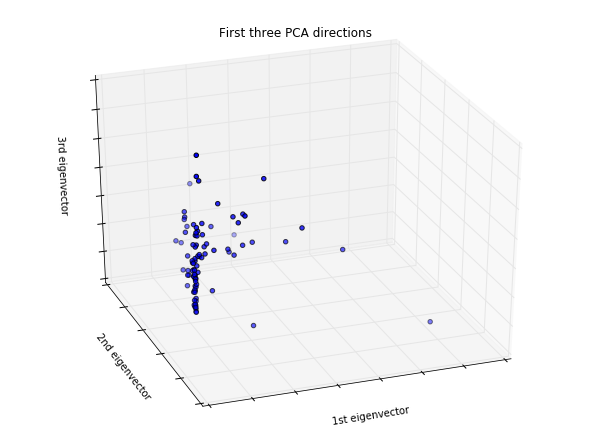

In [39]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2])
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

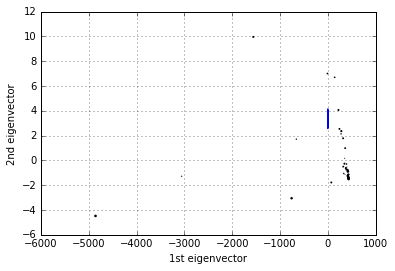

In [40]:
plt.plot(logxdata,yfit, label='Bird PCA')

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2])

plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.grid(True)
plt.show()

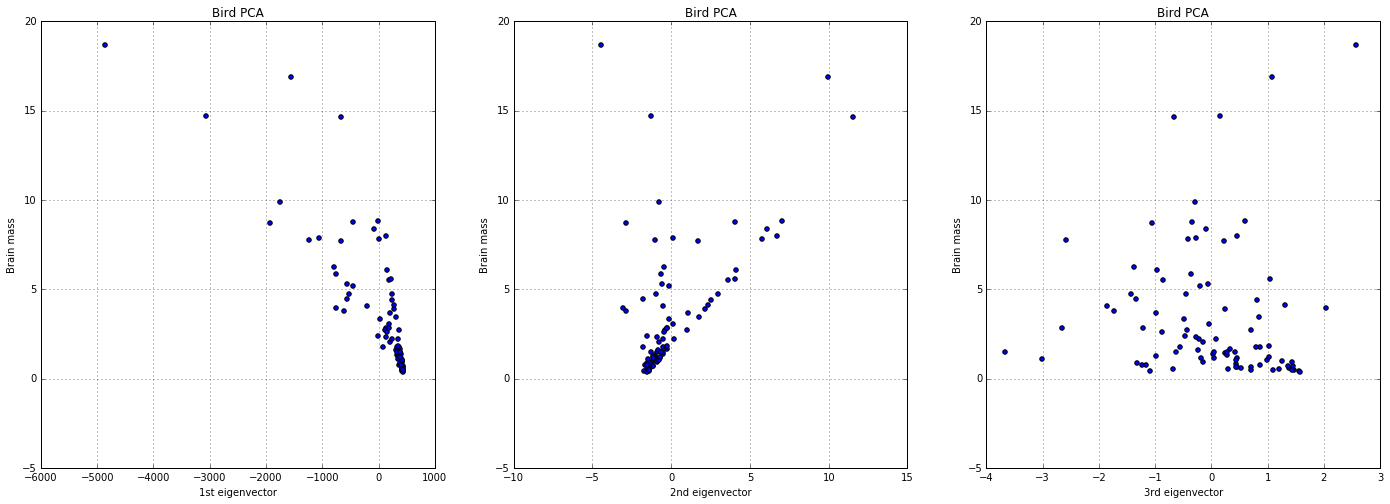

In [41]:
## 
plt.figure(figsize=(24,8))

xdata = X_reduced[:, 0]
ydata = dftmp['Brain mass']
plt.subplot(131), plt.scatter(xdata,ydata)
plt.xlabel('1st eigenvector')
plt.ylabel('Brain mass')
plt.title('Bird PCA')
plt.grid(True)

xdata = X_reduced[:, 1]
ydata = dftmp['Brain mass']
plt.subplot(132), plt.scatter(xdata,ydata)
plt.xlabel('2nd eigenvector')
plt.ylabel('Brain mass')
plt.title('Bird PCA')
plt.grid(True)

xdata = X_reduced[:, 2]
ydata = dftmp['Brain mass']
plt.subplot(133), plt.scatter(xdata,ydata)
plt.xlabel('3rd eigenvector')
plt.ylabel('Brain mass')
plt.title('Bird PCA')
plt.grid(True)

plt.show()

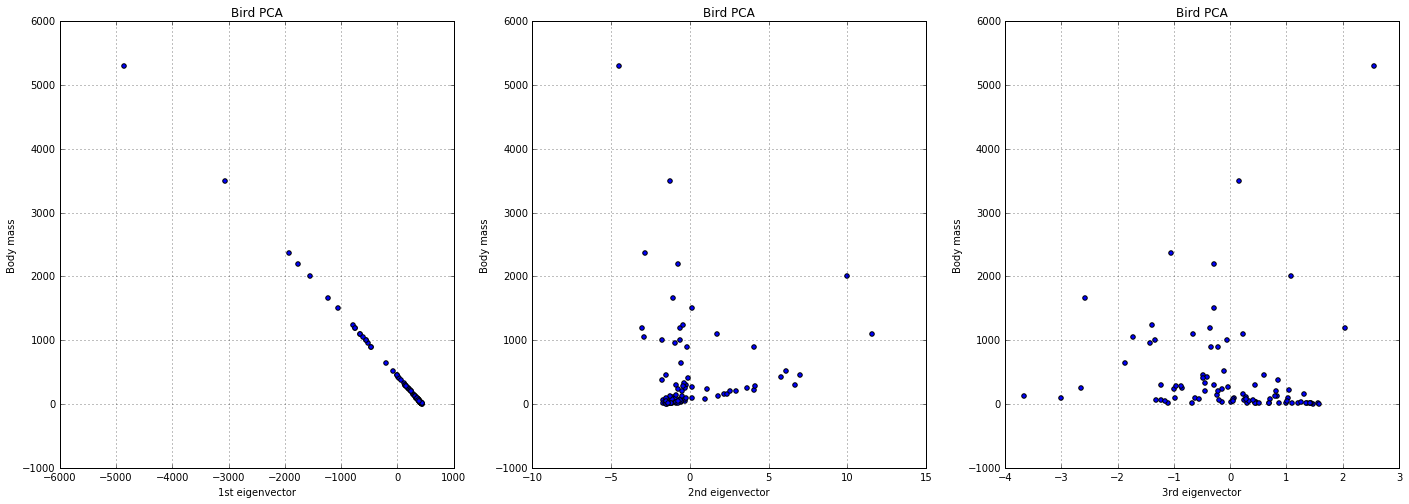

In [42]:
## 
plt.figure(figsize=(24,8))

xdata = X_reduced[:, 0]
ydata = dftmp['Body mass']
plt.subplot(131), plt.scatter(xdata,ydata)
plt.xlabel('1st eigenvector')
plt.ylabel('Body mass')
plt.title('Bird PCA')
plt.grid(True)

xdata = X_reduced[:, 1]
ydata = dftmp['Body mass']
plt.subplot(132), plt.scatter(xdata,ydata)
plt.xlabel('2nd eigenvector')
plt.ylabel('Body mass')
plt.title('Bird PCA')
plt.grid(True)

xdata = X_reduced[:, 2]
ydata = dftmp['Body mass']
plt.subplot(133), plt.scatter(xdata,ydata)
plt.xlabel('3rd eigenvector')
plt.ylabel('Body mass')
plt.title('Bird PCA')
plt.grid(True)

plt.show()

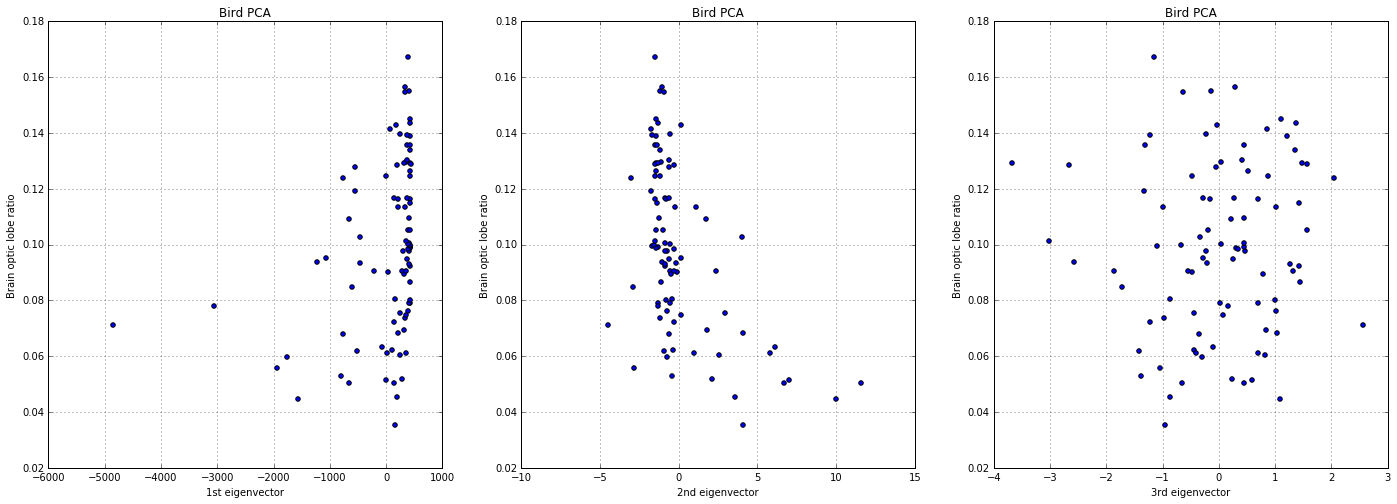

In [43]:
## 
plt.figure(figsize=(24,8))

xdata = X_reduced[:, 0]
ydata = dftmp['Brain optic lobe ratio']
plt.subplot(131), plt.scatter(xdata,ydata)
plt.xlabel('1st eigenvector')
plt.ylabel('Brain optic lobe ratio')
plt.title('Bird PCA')
plt.grid(True)

xdata = X_reduced[:, 1]
ydata = dftmp['Brain optic lobe ratio']
plt.subplot(132), plt.scatter(xdata,ydata)
plt.xlabel('2nd eigenvector')
plt.ylabel('Brain optic lobe ratio')
plt.title('Bird PCA')
plt.grid(True)

xdata = X_reduced[:, 2]
ydata = dftmp['Brain optic lobe ratio']
plt.subplot(133), plt.scatter(xdata,ydata)
plt.xlabel('3rd eigenvector')
plt.ylabel('Brain optic lobe ratio')
plt.title('Bird PCA')
plt.grid(True)

plt.show()

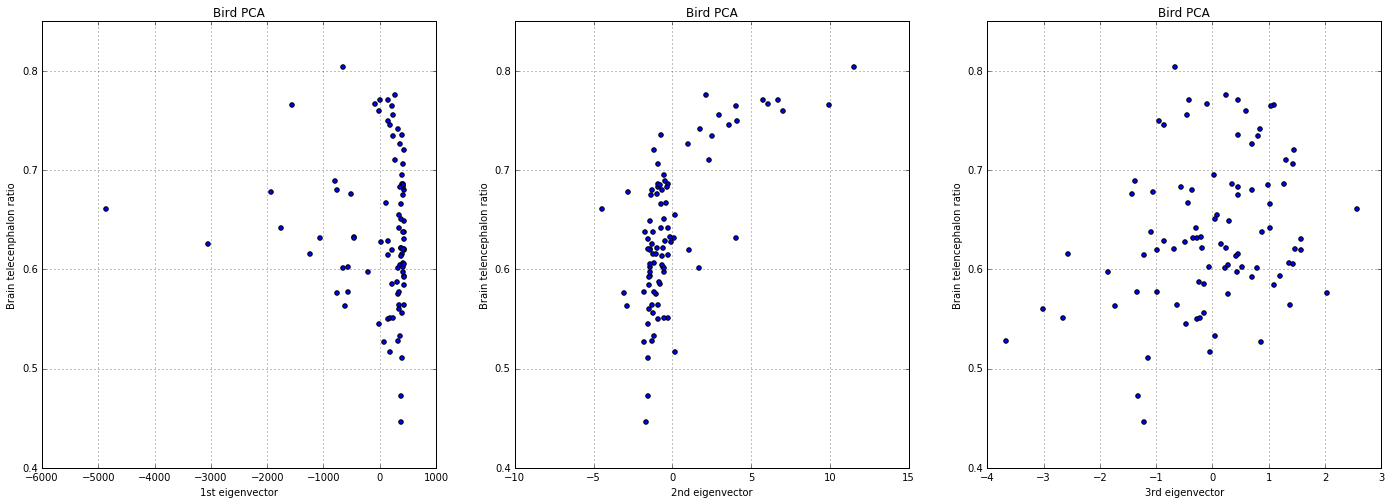

In [44]:
## 
plt.figure(figsize=(24,8))

xdata = X_reduced[:, 0]
ydata = dftmp['Brain telencephalon ratio']
plt.subplot(131), plt.scatter(xdata,ydata)
plt.xlabel('1st eigenvector')
plt.ylabel('Brain telecenphalon ratio')
plt.title('Bird PCA')
plt.grid(True)

xdata = X_reduced[:, 1]
ydata = dftmp['Brain telencephalon ratio']
plt.subplot(132), plt.scatter(xdata,ydata)
plt.xlabel('2nd eigenvector')
plt.ylabel('Brain telencephalon ratio')
plt.title('Bird PCA')
plt.grid(True)

xdata = X_reduced[:, 2]
ydata = dftmp['Brain telencephalon ratio']
plt.subplot(133), plt.scatter(xdata,ydata)
plt.xlabel('3rd eigenvector')
plt.ylabel('Brain telencephalon ratio')
plt.title('Bird PCA')
plt.grid(True)

plt.show()

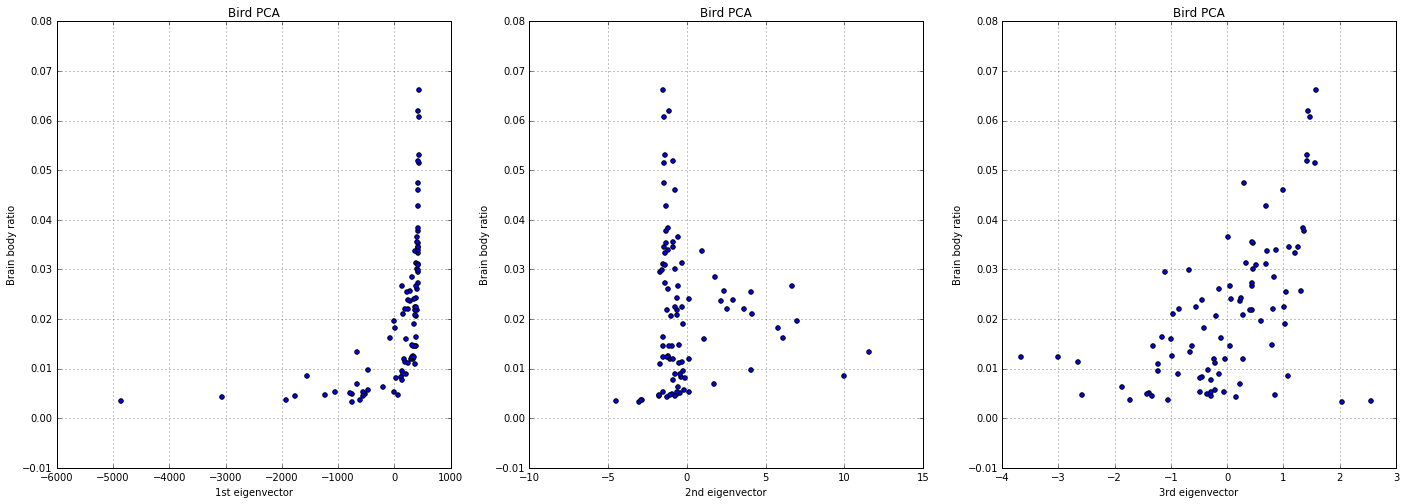

In [45]:
## 
plt.figure(figsize=(24,8))

xdata = X_reduced[:, 0]
ydata = dftmp['Brain body ratio']
plt.subplot(131), plt.scatter(xdata,ydata)
plt.xlabel('1st eigenvector')
plt.ylabel('Brain body ratio')
plt.title('Bird PCA')
plt.grid(True)

xdata = X_reduced[:, 1]
ydata = dftmp['Brain body ratio']
plt.subplot(132), plt.scatter(xdata,ydata)
plt.xlabel('2nd eigenvector')
plt.ylabel('Brain body ratio')
plt.title('Bird PCA')
plt.grid(True)

xdata = X_reduced[:, 2]
ydata = dftmp['Brain body ratio']
plt.subplot(133), plt.scatter(xdata,ydata)
plt.xlabel('3rd eigenvector')
plt.ylabel('Brain body ratio')
plt.title('Bird PCA')
plt.grid(True)

plt.show()

## Extra To Do:  Download a data set that seems interesting.  Make your own plots of the data, including PCA and topology.  Find patterns and clusters.

Public data exists for many fields sociology, sports, biology, finance, astrophysics, climate, etc.  

##   Example -- the bird migration data

In [46]:
import km
from sklearn import cluster

### The PCA axis are used as the "filter function", sometimes referred to a "lens" of the data.
### The "metric" is then the Euclidean distance between points defined by their position as seen in the PCA plots.

## It would be best to try other filter functions -- For example, the L-Inifinity Centrality: 
               #                                   The maximum distance of each point to the farthest point

##X = iris.data[:, :4]  # we only take the first two features.

X = dfgood['Migration distance']

data = numpy.zeros((len(X),4))
data[:,0] = X_reduced[:,0]
data[:,1] = X_reduced[:,1]
data[:,2] = X_reduced[:,2]
mapper = km.KeplerMapper(verbose=1)


reduced = mapper.fit_transform(data, projection=[0,1])

complex = mapper.map(reduced, data)  ## default

##complex = mapper.map(reduced, data, clusterer=cluster.DBSCAN(eps=.4, min_samples=3), nr_cubes=10, overlap_perc=0.3)
                     
                     #dimension_index=1, dimension_name="Y-axis")

mapper.visualize(complex, path_html="bird_topo.html", title="bird migration")

# This will save an html file defined by path_html.  
# You will need to load this file into your web browser to view the result.


## Why does nothing happen?


..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))

Mapping on data shaped (91, 2) using dimensions

Creating 1000 hypercubes.

created 0 edges and 0 nodes in 0:00:00.020022.

Wrote d3.js graph to 'bird_topo.html'


In [47]:
data

array([[ -6.59667314e+02,   1.70746136e+00,   2.22460714e-01,
          0.00000000e+00],
       [  1.80349455e+02,   1.41498745e-01,  -3.73364479e-02,
          0.00000000e+00],
       [  4.26361068e+02,  -1.46845505e+00,   1.10208409e+00,
          0.00000000e+00],
       [  4.32861278e+02,  -1.42558293e+00,   1.47184057e+00,
          0.00000000e+00],
       [  4.01356820e+02,  -7.32093844e-01,   4.56782174e-01,
          0.00000000e+00],
       [  4.05358473e+02,  -1.20461233e+00,  -1.46057431e-01,
          0.00000000e+00],
       [  1.40350088e+02,  -2.67717918e-01,  -1.22199688e+00,
          0.00000000e+00],
       [ -7.59657523e+02,  -6.40009027e-01,  -3.57354682e-01,
          0.00000000e+00],
       [  1.10350989e+02,  -3.70750202e-01,  -4.39591148e-01,
          0.00000000e+00],
       [ -1.93366116e+03,  -2.83498423e+00,  -1.05186890e+00,
          0.00000000e+00],
       [  4.24360852e+02,  -1.40790270e+00,   1.20596776e+00,
          0.00000000e+00],
       [ -4.85968365e

In [48]:

dftmp = dfgood.copy()
del dftmp['Species']

X_reduced = PCA(n_components=3).fit_transform(dftmp)

In [49]:
import km
from sklearn import cluster

### The PCA axis are used as the "filter function", sometimes referred to a "lens" of the data.
### The "metric" is then the Euclidean distance between points defined by their position as seen in the PCA plots.

##X = iris.data[:, :4]  # we only take the first two features.
X = numpy.log10(dftmp['Migration distance'])



data = numpy.zeros((len(X),4))
data[:,0] = X_reduced[:,0]/1000.
data[:,1] = X_reduced[:,1]/1000.
data[:,2] = X_reduced[:,2]
mapper = km.KeplerMapper(verbose=1)


reduced = mapper.fit_transform(data, projection=[0,1])
##reduced = mapper.fit_transform(datairis)  ## default 

## complex = mapper.map(reduced, datairis)  ## default

complex = mapper.map(reduced, data, clusterer=cluster.DBSCAN(eps=.4, min_samples=3), nr_cubes=10, overlap_perc=0.3)
                     
                     #dimension_index=1, dimension_name="Y-axis")

mapper.visualize(complex, path_html="bird_topo.html", title="bird migration")

# This will save an html file defined by path_html.  
# You will need to load this file into your web browser to view the result.



..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))

Mapping on data shaped (91, 2) using dimensions

Creating 1000 hypercubes.

created 1 edges and 9 nodes in 0:00:00.060239.

Wrote d3.js graph to 'bird_topo.html'


In [50]:
data

array([[ -2.01581920e+00,  -6.03724189e-01,  -1.07602885e+00,
          0.00000000e+00],
       [  4.02760438e-01,   1.69190928e-01,  -2.60955448e-01,
          0.00000000e+00],
       [  1.04826850e+00,   3.97301847e-01,   1.24251756e+00,
          0.00000000e+00],
       [ -2.50107099e+00,   5.02757097e-01,   2.40039942e+00,
          0.00000000e+00],
       [ -1.42106907e+00,   4.41130894e-01,   1.26958339e+00,
          0.00000000e+00],
       [ -1.22623294e+00,   4.39702174e-01,   1.62853061e+00,
          0.00000000e+00],
       [  8.37476723e-01,   1.17056419e-01,  -9.43097265e-02,
          0.00000000e+00],
       [ -6.27145592e-01,  -7.42468479e-01,   7.50464457e-01,
          0.00000000e+00],
       [  2.25788824e+00,   4.74458562e-02,  -4.00468283e-01,
          0.00000000e+00],
       [  1.39284004e+00,  -1.97324392e+00,   2.11521769e+00,
          0.00000000e+00],
       [ -1.89106423e-01,   4.29797799e-01,   1.59835891e+00,
          0.00000000e+00],
       [ -1.49421320e

In [51]:
from sklearn.preprocessing import normalize
data_norm = normalize(data)
data_norm
reduced = mapper.fit_transform(data_norm, projection=[0,1])
##reduced = mapper.fit_transform(datairis)  ## default 

## complex = mapper.map(reduced, datairis)  ## default

complex = mapper.map(reduced, data_norm, clusterer=cluster.DBSCAN(eps=.4, min_samples=3), nr_cubes=10, overlap_perc=0.3)
                     
                     #dimension_index=1, dimension_name="Y-axis")

mapper.visualize(complex, path_html="bird_topo.html", title="bird migration")

# This will save an html file defined by path_html.  
# You will need to load this file into your web browser to view the result.


..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))

Mapping on data shaped (91, 2) using dimensions

Creating 1000 hypercubes.

created 11 edges and 13 nodes in 0:00:00.076064.

Wrote d3.js graph to 'bird_topo.html'


## To Do:  Play with the topology plot -- try to separate out the 3 species into topological networks.  

Note that it will help to look at the documentation and the source python code.

In [52]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA


# import the Iris flower data set
iris = datasets.load_iris()
X = iris.data[:, :4]  # we only take the first two features.
Y = iris.target

## inspect the data
iris
# import the Iris flower data set
iris = datasets.load_iris()
X = iris.data[:, :4]  # we only take the first two features.
Y = iris.target

## inspect the data
iris

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n

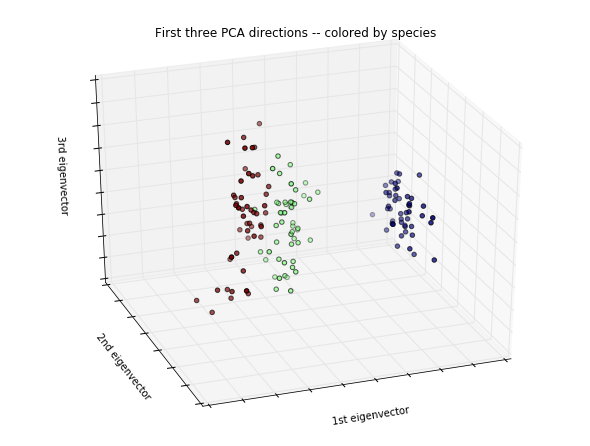

In [53]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions.  
#  This can reveal clustering and "shape of data" that is not obvious by the usual direct plotting of properties.


plt.show()

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y)
ax.set_title("First three PCA directions -- colored by species")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [54]:

import km
from sklearn import cluster

### The PCA axis are used as the "filter function", sometimes referred to a "lens" of the data.
### The "metric" is then the Euclidean distance between points defined by their position as seen in the PCA plots.

#datairis = numpy.zeros((len(X),3))
datairis = numpy.zeros((len(X),4))
datairis[:,0] = X_reduced[:,0]
datairis[:,1] = X_reduced[:,1]
datairis[:,2] = X_reduced[:,2]

##km.np.genfromtxt('lion-reference.csv',delimiter=',')

mapper = km.KeplerMapper(verbose=1)


reduced = mapper.fit_transform(datairis, projection=[0,1])
##reduced = mapper.fit_transform(datairis)  ## default 

##complex = mapper.map(reduced, datairis)  ## default

##complex = mapper.map(reduced, datairis, clusterer=cluster.DBSCAN(eps=.4, min_samples=3), nr_cubes=10, overlap_perc=0.3)
complex = mapper.map(reduced, datairis, clusterer=cluster.DBSCAN(eps=.6, min_samples=3), nr_cubes=8, overlap_perc=0.5)
                     
                     #dimension_index=1, dimension_name="Y-axis")

mapper.visualize(complex, path_html="iris_keplermapper_outputtest1.html", title="iris1")

# This will save an html file defined by path_html.  
# You will need to load this file into your web browser to view the result.



..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))

Mapping on data shaped (150, 2) using dimensions

Creating 512 hypercubes.

created 43 edges and 25 nodes in 0:00:00.169583.

Wrote d3.js graph to 'iris_keplermapper_outputtest1.html'
